In [6]:
import numpy as np
import pandas as pd
file_path = "/content/real_estate_data.csv"
df = pd.read_csv(file_path)

In [7]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [11]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [15]:
df.dropna(inplace = True)
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


In [18]:
X = df.drop(columns = 'MEDV')
Y = df['MEDV']
X.head()
Y.head()


0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

In [24]:
#Finally lets split our data into a training and testing dataset using `train_test_split` from `sklearn.model_selection`
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)

#First lets start by creating a `DecisionTreeRegressor` object, setting the `criterion` parameter to `squared_error` for  Squared Error
regression_tree = DecisionTreeRegressor(criterion= "squared_error")


In [25]:
#Training
#using the `fit` method on the `DecisionTreeRegressor`

regression_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [26]:
#Evaluation
#To evaluate our dataset we will use the score method of the DecisionTreeRegressor object providing our testing data, this number is the
#R^2value which indicates the coefficient of determination
regression_tree.score(X_test, Y_test)

0.85738118680848

In [28]:
#We can also find the average error in our testing set which is the average error in median home value prediction
prediction = regression_tree.predict(X_test)

print("$",(prediction - Y_test).abs().mean()*1000)

$ 2584.8101265822784


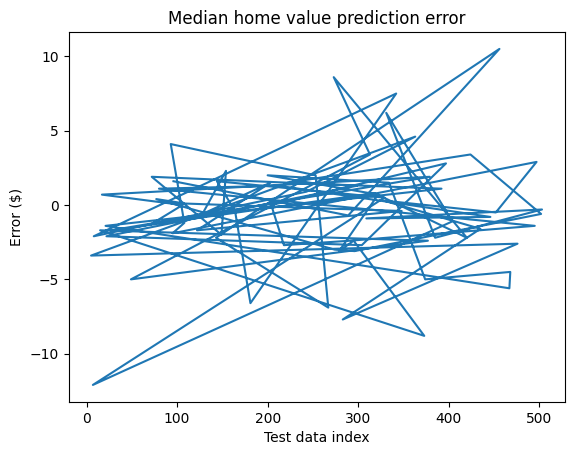

In [29]:
#line graph of this value

import matplotlib.pyplot as plt

plt.plot(prediction - Y_test)
plt.title("Median home value prediction error")
plt.xlabel("Test data index")
plt.ylabel("Error ($)")
plt.show()
